In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [26]:
from blg_strain.bands import get_bands
from blg_strain.berry import berry_mu
from blg_strain.utils.utils import make_grid
from blg_strain.hamiltonian import H_dkx, H_dky, H2_dkx, H2_dky

In [27]:
kx, ky, Kx, Ky = make_grid()

In [28]:
# Some parameters common to all Hamiltonians
from blg_strain.utils.const import gamma1, hbar, v0, v3, meff
from blg_strain.utils.params import w

Delta = 0.01
delta = 0.01
theta=0

o = np.ones_like(Kx)
Delta = Delta * o
gamma1 = gamma1 * o

px, py = hbar * Kx, hbar * Ky

# 4x4 Hamiltonian (Moulsdale)

Taking $w_4=\Delta_{AB}=v_4=0$,
$$
\mathcal{H} = \left( \begin{array}{cccc}
    -\frac12\Delta   &   v_3\pi + w_3    &   0  &   v_0\pi^\dagger   \\
    v_3\pi^\dagger+w_3^*     &   \frac12\Delta     &   v_0\pi   &   0   \\
    0       &   v_0\pi^\dagger       &   \frac12\Delta  &   \gamma_1   \\
    v_0\pi            &   0  &   \gamma_1   &   -\frac12\Delta   \\
\end{array}\right)
$$
with $\pi=\xi\hbar k_x+i\hbar k_y$.

$
\partial_{k_x}\mathcal{H} = \xi\hbar\left( \begin{array}{cccc}
    0   &   v_3 &   0  &   v_0   \\
    v_3     &   0     &   v_0   &   0   \\
    0       &   v_0       &   0  &   0  \\
    v_0           &   0  &   0   &   0   \\
\end{array}\right)
\,\,\,\,\,\,\,\,\,\,\,\,
\partial_{k_y}\mathcal{H} = i\hbar\left( \begin{array}{cccc}
    0   &   v_3&   0  &   -v_0   \\
    -v_3      &   0     &   v_0   &   0   \\
    0       &   -v_0       &   0  &   0  \\
    v_0           &   0  &   0   &   0   \\
\end{array}\right)
$

In [50]:
def H4(xi):
    w3 = w(delta, idx=3, xi=xi, theta=theta) * o
    w3s = w3.conjugate()
    
#     w3 = 0 * o
#     w3s = 0 * o
#     v3 = 0

    pi = xi * px + 1j * py
    pidag = xi * px - 1j * py
    return np.array([
        [-1/2 * Delta,      v3 * pi + w3,       0 * o,         v0*pidag     ],
        [v3 * pidag + w3s,  1/2 * Delta,        v0 * pi,       0 *o         ],
        [0 * o,                 v0 * pidag,     1/2 * Delta,   gamma1       ],
        [v0 * pi,           0* o,               gamma1,        -1/2 * Delta ]
    ])

In [51]:
xi = 1
H = H4(xi)
kx, ky, Kx, Ky, E, Psi = get_bands(xi=xi, ham=H)
# H_gradient = H_dkx(xi), H_dky(xi)
H_gradient = np.gradient(H, kx, ky, axis=(-2, -1))
Omega, Mu = berry_mu(Kx, Ky, E, Psi, xi=xi, H_gradient=H_gradient)

xi = -1
H = H4(xi)
kx2, ky2, Kx2, Ky2, E2, Psi2 = get_bands(xi=xi, ham=H)
# H_gradient = H_dkx(xi), H_dky(xi)
H_gradient = np.gradient(H, kx, ky, axis=(-2, -1))
Omega2, Mu2 = berry_mu(Kx, Ky, E2, Psi2, xi=xi, H_gradient=H_gradient)

<IPython.core.display.Javascript object>


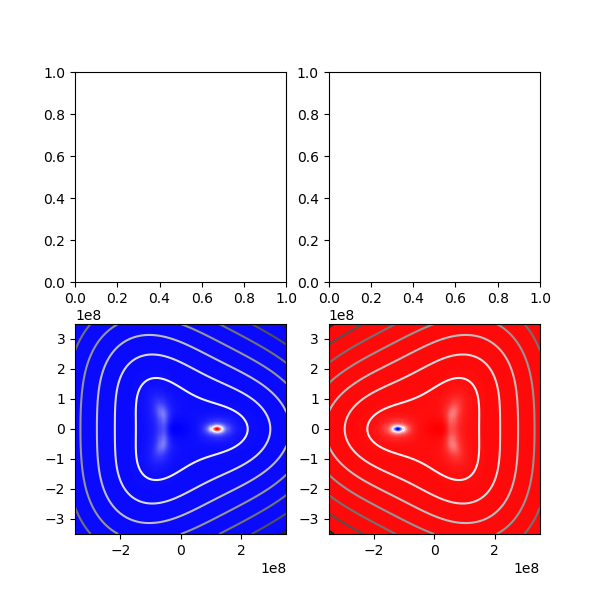

In [52]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(6,6))
# ax[0,0].pcolormesh(Kx, Ky, E[2])
# ax[0,1].pcolormesh(Kx, Ky, E2[2])

ax[1,0].pcolormesh(Kx, Ky, Omega[2], cmap='bwr')
ax[1,1].pcolormesh(Kx, Ky, Omega2[2], cmap='bwr')
ax[1,0].contour(Kx, Ky, E[2], cmap='Greys')
ax[1,1].contour(Kx, Ky, E2[2], cmap='Greys')

# 2x2 Hamiltonian (Moulsdale low-energy effective)

Taking $w_4=\Delta_{AB}=v_4=0$,
$$ 
H_{\text{eff}}= 
\left(
\begin{array}{cc}
 -\frac12\Delta & -\frac{(\pi^\dagger)^2}{2m} + v_3\pi +w_3\\ 
 -\frac{\pi^2}{2m} +  v_3\pi^{\dagger}+w_3^* & \frac12\Delta
\end{array}
\right)
$$
with $\pi=\xi\hbar k_x+i\hbar k_y$. Note $\partial_{k_{x}}\pi^{(\dagger)} = \xi\hbar$ and $\partial_{k_{y}}\pi^{(\dagger)} = (-)i\hbar$.

$
\partial_{k_x}H_{\text{eff}}= 
\xi\hbar\left(
\begin{array}{cc}
 0 & -\frac{\pi^\dagger}{m} + v_3\\ 
 -\frac{\pi}{m} +  v_3 & 0
\end{array}
\right)
\,\,\,\,\,\,\,
\partial_{k_y}H_{\text{eff}}= 
i\hbar\left(
\begin{array}{cc}
 0 & \frac{\pi^\dagger}{m} + v_3\\ 
 -\frac{\pi}{m} -  v_3 & 0
\end{array}
\right)
$

In [85]:
def H2(xi):    
    w3 = w(delta, idx=3, xi=xi, theta=theta) * o
    w3s = w3.conjugate()
    
    w3 = 0 * o
    w3s = 0 * o
    v3 = 0

    pi = xi * px + 1j * py
    pidag = xi * px - 1j * py
    return np.array([
        [-1/2 * Delta,      -pidag **2 / (2 * meff) + v3 * pi + w3 ],  
        [-pi**2 / (2 * meff) + v3 * pidag + w3s,  1/2 * Delta  ]
    ])

In [86]:
xi = 1
H = H2(xi)
kx, ky, Kx, Ky, E, Psi = get_bands(xi=xi, ham=H)
# H_gradient = H2_dkx(Kx, Ky, xi), H2_dky(Kx, Ky, xi)
H_gradient = np.gradient(H, kx, ky, axis=(-2, -1))
# H_gradient = None
Omega, Mu = berry_mu(Kx, Ky, E, Psi, xi=xi)#, H_gradient=H_gradient)

xi = -1
H = H2(xi)
kx2, ky2, Kx2, Ky2, E2, Psi2 = get_bands(xi=xi, ham=H)
# H_gradient = H2_dkx(Kx, Ky, xi), H2_dky(Kx, Ky, xi)
H_gradient = np.gradient(H, kx, ky, axis=(-2, -1))
# H_gradient = None
Omega2, Mu2 = berry_mu(Kx, Ky, E2, Psi2, xi=xi)#, H_gradient=H_gradient)

<IPython.core.display.Javascript object>


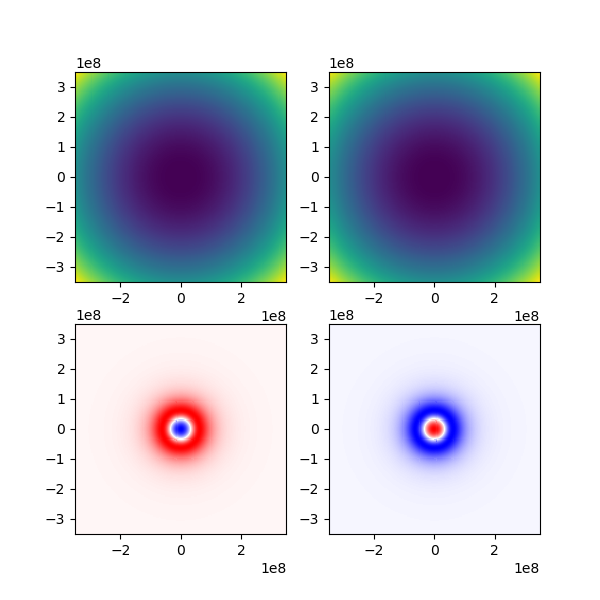

In [87]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(6,6))
ax[0,0].pcolormesh(Kx, Ky, E[1])
ax[0,1].pcolormesh(Kx, Ky, E2[1])

ax[1,0].pcolormesh(Kx, Ky, Omega[1], cmap='bwr')
ax[1,1].pcolormesh(Kx, Ky, Omega2[1], cmap='bwr')

# 2x2 Hamiltonian (Battilomo)

$$ 
H_{\text{eff}}= 
\left(-\frac1{2m}(p_x^2-p_y^2) + \xi v_3 p_x + w_3\right)\sigma_x
-\left(\frac1m p_xp_y + \xi v_3 p_y\right)\sigma_y + \frac\Delta2\sigma_z
$$
with $p_j = \hbar k_j$

$$
\partial_{k_x}H_{\text{eff}}= \left(-\frac{\hbar p_x}{m} + \xi v_3\hbar\right)\sigma_x - \left(\frac{\hbar p_y}{m}\right)\sigma_y
$$
$$
\partial_{k_y}H_{\text{eff}}= \left(\frac{\hbar p_y}{m}\right)\sigma_x - \left(\frac{\hbar p_y}{m} + \xi v_3 \hbar\right)\sigma_y
$$

In [75]:
def H2b(xi):    
    w3 = w(delta, idx=3, xi=xi, theta=theta) * o
    w3s = w3.conjugate()  # note w3 == w3s for theta=0
    
#     w3 = 0 * o
#     w3s = 0 * o
#     v3 = 0
    
    return np.array([
        [1/2 * Delta,      -1 / (2 * meff) * (px**2 - py**2) + xi * v3 * px + w3 + 1j/meff * px * py + 1j*xi*v3*py],  
        [-1 / (2 * meff) * (px**2 - py**2) + xi * v3 * px + w3s - 1j/meff * px * py - 1j*xi*v3*py,  -1/2 * Delta  ]
    ])

In [76]:
xi = 1
H = H2b(xi)
kx, ky, Kx, Ky, E, Psi = get_bands(xi=xi, ham=H)
# H_gradient = H2_dkx(Kx, Ky, xi), H2_dky(Kx, Ky, xi)
H_gradient = np.gradient(H, kx, ky, axis=(-2, -1))
# H_gradient = None
Omega, Mu = berry_mu(Kx, Ky, E, Psi, xi=xi, H_gradient=H_gradient)

xi = -1
H = H2b(xi)
kx2, ky2, Kx2, Ky2, E2, Psi2 = get_bands(xi=xi, ham=H)
# H_gradient = H2_dkx(Kx, Ky, xi), H2_dky(Kx, Ky, xi)
H_gradient = np.gradient(H, kx, ky, axis=(-2, -1))
# H_gradient = None
Omega2, Mu2 = berry_mu(Kx, Ky, E2, Psi2, xi=xi, H_gradient=H_gradient)

<IPython.core.display.Javascript object>


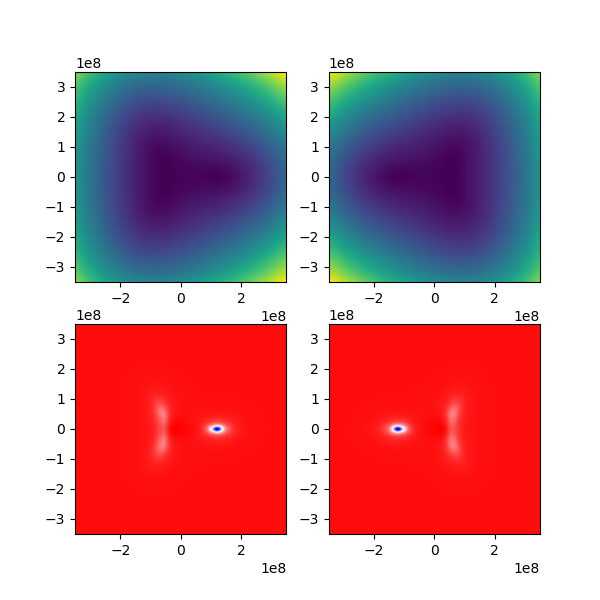

In [77]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(6,6))
ax[0,0].pcolormesh(Kx, Ky, E[1])
ax[0,1].pcolormesh(Kx, Ky, E2[1])

ax[1,0].pcolormesh(Kx, Ky, Omega[1], cmap='bwr')
ax[1,1].pcolormesh(Kx, Ky, Omega2[1], cmap='bwr')

# 2x2 Hamiltonian (Battilomo with diagonal multiplied by xi)

$$ 
H_{\text{eff}}= 
\left(-\frac1{2m}(p_x^2-p_y^2) + \xi v_3 p_x + w_3\right)\sigma_x
-\left(\frac1m p_xp_y + \xi v_3 p_y\right)\sigma_y + \xi \frac\Delta2\sigma_z
$$
with $p_j = \hbar k_j$

In [78]:
def H2b2(xi):    
    w3 = w(delta, idx=3, xi=xi, theta=theta) * o
    w3s = w3.conjugate()  # note w3 == w3s for theta=0
    
#     w3 = 0 * o
#     w3s = 0 * o
#     v3 = 0
    
    return np.array([
        [1/2 * xi * Delta,      -1 / (2 * meff) * (px**2 - py**2) + xi * v3 * px + w3 + 1j/meff * px * py + 1j*xi*v3*py],  
        [-1 / (2 * meff) * (px**2 - py**2) + xi * v3 * px + w3s - 1j/meff * px * py - 1j*xi*v3*py,  -1/2 * xi * Delta  ]
    ])

In [81]:
xi = 1
H = H2b2(xi)
kx, ky, Kx, Ky, E, Psi = get_bands(xi=xi, ham=H)
# H_gradient = H2_dkx(Kx, Ky, xi), H2_dky(Kx, Ky, xi)
H_gradient = np.gradient(H, kx, ky, axis=(-2, -1))
# H_gradient = None
Omega, Mu = berry_mu(Kx, Ky, E, Psi, xi=xi, H_gradient=H_gradient)

xi = -1
H = H2b2(xi)
kx2, ky2, Kx2, Ky2, E2, Psi2 = get_bands(xi=xi, ham=H)
# H_gradient = H2_dkx(Kx, Ky, xi), H2_dky(Kx, Ky, xi)
H_gradient = np.gradient(H, kx, ky, axis=(-2, -1))
# H_gradient = None
Omega2, Mu2 = berry_mu(Kx, Ky, E2, Psi2, xi=xi, H_gradient=H_gradient)

<IPython.core.display.Javascript object>


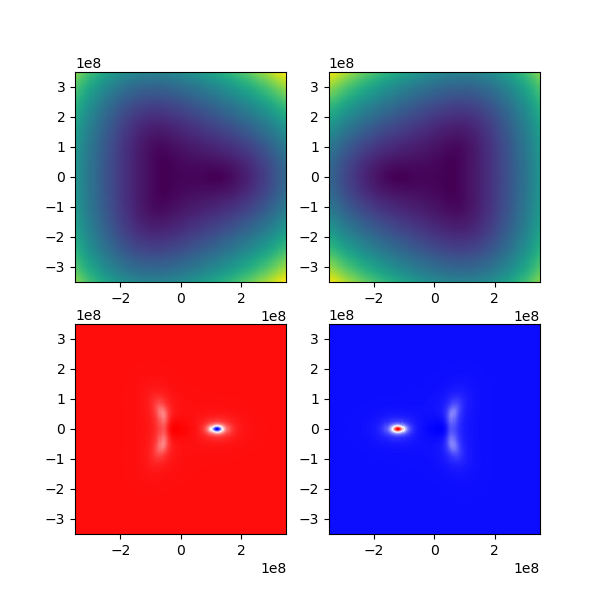

In [82]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(6,6))
ax[0,0].pcolormesh(Kx, Ky, E[1])
ax[0,1].pcolormesh(Kx, Ky, E2[1])

ax[1,0].pcolormesh(Kx, Ky, Omega[1], cmap='bwr')
ax[1,1].pcolormesh(Kx, Ky, Omega2[1], cmap='bwr')